# importing libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt


C:\Users\baban\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Dataset

In [11]:
data=pd.read_csv(r'D:/datapro internship/McDonaldReviews.csv')
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


#  Plotting histogram of star reviews

<function matplotlib.pyplot.show(close=None, block=None)>

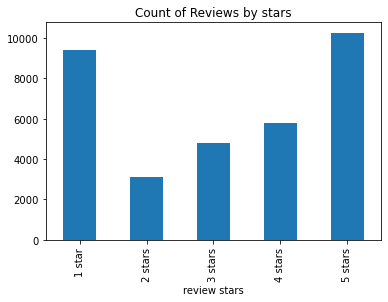

In [22]:
ax=data['rating'].value_counts().sort_index().plot(kind='bar',
                                                       title='Count of Reviews by stars',
                                                       )
ax.set_xlabel('review stars')
plt.show

 # importing dependecies for pretrained model

In [ ]:
1from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm

In [6]:
MODEL= f'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer= AutoTokenizer.from_pretrained(MODEL)
model= AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Defining function to run the pretrained Model

In [8]:

def polarity_score(example):
    encoded_text= tokenizer(example, return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }
    return scores_dict

# Running the poarity score on First 500 values of dataset

In [ ]:
res={}
for i,row in tqdm(data.head(500).iterrows(), total=len(data.head(500))):
      try:
          text=row['review']
          myid=row['reviewer_id']
          result=polarity_score(text)
          res[myid]=result
      except RuntimeError:
          print(f'Broke for id{myid}')

In [21]:
result_df=pd.DataFrame(res).T
result_df=result_df.reset_index().rename(columns={'index':'reviewer_id'})
result_df=result_df.merge(data.head(500),how='left')
result_df.head()

,reviewer_id,negative,neutral,positive,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,0.921713,0.069447,0.008840,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,0.009263,0.030220,0.960517,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,0.316454,0.644035,0.039511,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,0.059305,0.407701,0.532993,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,0.921453,0.071842,0.006705,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
